In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [30]:
import plotly.offline as pyoff
import plotly.graph_objs as go

In [31]:
import plotly.graph_objs as go

In [32]:
import pandas as pd
import io
from google.colab import files

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [34]:
train = pd.read_csv('/content/gdrive/MyDrive/Liar Dataset/fake news detection(LIAR)/liar_train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/Liar Dataset/fake news detection(LIAR)/liar_test.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



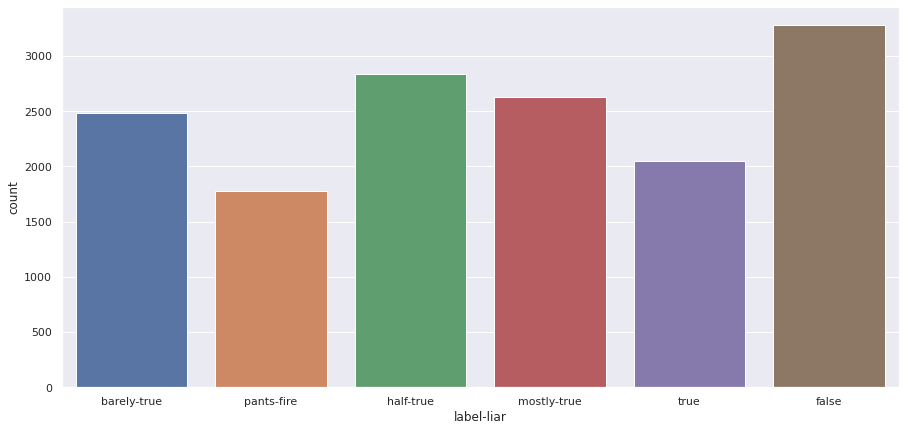

In [35]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.countplot(train['label-liar'])

In [36]:
train = train.replace(to_replace ="barely-true",
                 value =1)
train = train.replace(to_replace ="pants-fire",
                 value =1)
train = train.replace(to_replace ="half-true",
                 value =0)
train = train.replace(to_replace ="mostly-true",
                 value =0)
train = train.replace(to_replace ="false",
                 value =1)
train = train.replace(to_replace ="true",
                 value =0)

In [37]:
test = test.replace(to_replace ="barely-true",
                 value =1)
test= test.replace(to_replace ="pants-fire",
                 value =1)
test = test.replace(to_replace ="half-true",
                 value =1)
test = test.replace(to_replace ="mostly-true",
                 value =1)
test = test.replace(to_replace ="false",
                 value =1)
test = test.replace(to_replace ="true",
                 value =0)

In [38]:
train = train.drop(['id','date', 'speaker', 'sources','paragraph_based_content'], axis=1)
test = test.drop(['id','date', 'speaker', 'sources','paragraph_based_content'], axis=1)

df = pd.concat([train, test])
# Merging title and text
df['fullText_based_content'] = df['statement'] + ' ' + df['fullText_based_content']




# Randomize the rows so its all mixed up
df = df.sample(frac=1).reset_index(drop=True)

# Drop columns not needed
df = df.drop(['statement'], axis = 1)
df = df.sample(frac=1)
df.head(10)

fullText_based_content  label-liar
8215   Say Portland Public Schools' central administr...           0
6209   There "are 500 registered Republicans moving" ...           0
5235   "There's a loophole where you can sell guns wi...           1
7079   "The Kurds are much safer right now." On the d...           1
2842   Says Gov. Scott Walker "has been rated America...           1
13684  Says Sherrod Brown voted "for the $1.17 trilli...           0
1443   Says because of his actions, Wisconsin "proper...           0
11064  Says "10 days after Hurricane Katrina, this ch...           0
8783   "We know from ... the federal data, that they ...           1
13038  "For the first time in eight years, our budget...           0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



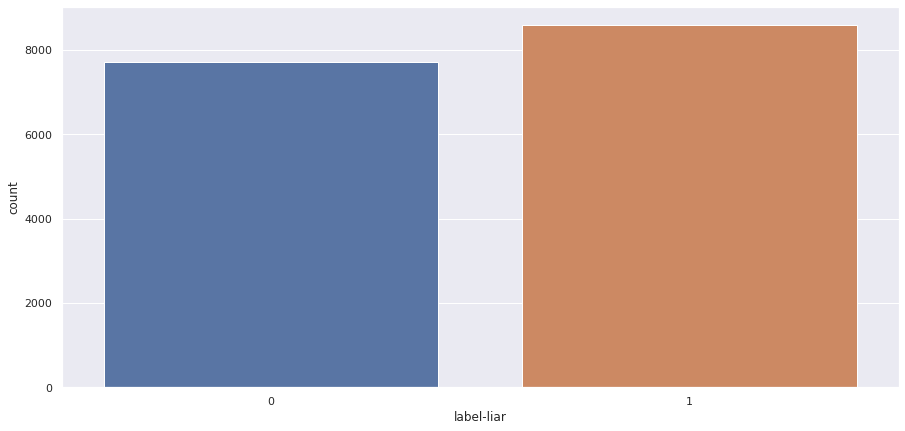

In [40]:
plt.figure(figsize=(15,7))
sns.set(style="darkgrid")
sns.countplot(df['label-liar'])

# Data Cleaning

In [48]:
import string
import nltk
import re,string,unicodedata
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')
nltk.download('stopwords')
from bs4 import BeautifulSoup
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [45]:
import nltk
nltk.download('stopwords')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [49]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def rem_punctuation(text):
  return text.translate(str.maketrans('','',string.punctuation))
#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)
#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)
#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = rem_punctuation(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text
#Apply function on review column
df['fullText_based_content']=df['fullText_based_content'].apply(denoise_text)

# Applying 5-6 algo with TF_IDF and Countvectorizer using n-gram

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
def get_prediction(vectorizer, classifier, X_train, X_test, y_train, y_test):
    pipe = Pipeline([('vector', vectorizer),
                    ('model', classifier)])
    model = pipe.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuarcy: {}".format(round(accuracy_score(y_test, y_pred)*100,2)))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Classification Report: \n", classification_report(y_test, y_pred))

In [ ]:
print("******USING STEMMED TEXT********")
X_train, X_test, y_train, y_test = train_test_split(df['fullText_based_content'], df['label-liar'], test_size = 0.3, random_state= 0)
classifiers = [ LogisticRegression(), SGDClassifier(), MultinomialNB(), BernoulliNB(), LinearSVC(),
              KNeighborsClassifier(n_neighbors=5)]
for classifier in classifiers:
    print("\n\n", classifier)
    print("***********Usng Count Vectorizer****************")
    get_prediction(CountVectorizer(ngram_range=(1,2), max_df = 5), classifier, X_train, X_test, y_train, y_test)
    print("***********Usng TFIDF Vectorizer****************")
    get_prediction(TfidfVectorizer(ngram_range=(1,2), max_df = 5), classifier, X_train, X_test, y_train, y_test)